**Forecasting Using Prophet**

In [ ]:

import pandas as pd
import prophet
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/My Drive/Colab Notebooks/monthly-car-sales.csv')

In [ ]:
df.head()

,Month,Sales
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587


In [ ]:

df.tail()

,Month,Sales
103,1968-08,16722
104,1968-09,14385
105,1968-10,21342
106,1968-11,17180
107,1968-12,14577


<Axes: >

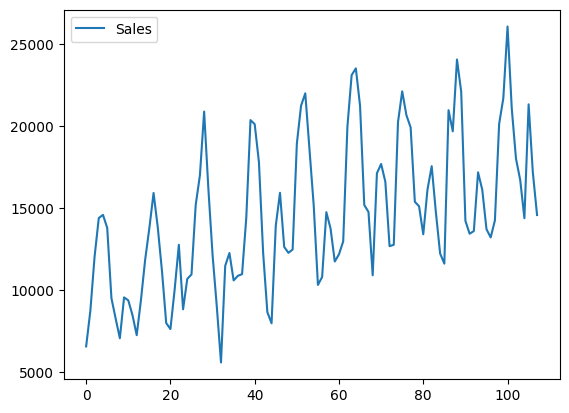

In [ ]:
df.plot()

In [ ]:
df.columns = ['ds','y']
df.head()

,ds,y
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587


In [ ]:
#df.drop(144,axis=0,inplace=True)

In [ ]:
df.tail()

,ds,y
103,1968-08,16722
104,1968-09,14385
105,1968-10,21342
106,1968-11,17180
107,1968-12,14577


In [ ]:
df['ds'] = pd.to_datetime(df['ds'])

In [ ]:
df.head()

,ds,y
0,1960-01-01,6550
1,1960-02-01,8728
2,1960-03-01,12026
3,1960-04-01,14395
4,1960-05-01,14587


In [ ]:
df.tail()

,ds,y
103,1968-08-01,16722
104,1968-09-01,14385
105,1968-10-01,21342
106,1968-11-01,17180
107,1968-12-01,14577


In [ ]:
from prophet import Prophet

In [ ]:
#dir(Prophet)

In [ ]:
# Initialize the Model
model=Prophet()

In [ ]:
df.columns

Index(['ds', 'y'], dtype='object')

In [ ]:
df.dropna(axis=0,inplace=True)

In [ ]:
df.isnull().sum()

ds    0
y     0
dtype: int64

In [ ]:
df.head()

,ds,y
0,1960-01-01,6550
1,1960-02-01,8728
2,1960-03-01,12026
3,1960-04-01,14395
4,1960-05-01,14587


In [ ]:
model.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq7qxcmpm/35wf52al.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq7qxcmpm/v7tpsj7r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40794', 'data', 'file=/tmp/tmpq7qxcmpm/35wf52al.json', 'init=/tmp/tmpq7qxcmpm/v7tpsj7r.json', 'output', 'file=/tmp/tmpq7qxcmpm/prophet_model4n6rzd75/prophet_model-20230701155912.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:59:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:59:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# model.save('forecast3.h5')

In [ ]:
import joblib

In [ ]:
joblib.dump(model,"sales.sav")

['sales.sav']

In [ ]:
import pickle
with open('forecast.h5', 'wb') as f:
    pickle.dump(model, f)

In [ ]:
model.component_modes

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [ ]:
df.tail()

,ds,y
103,1968-08-01,16722
104,1968-09-01,14385
105,1968-10-01,21342
106,1968-11-01,17180
107,1968-12-01,14577


In [ ]:
### Create future dates of 365 days
future_dates=model.make_future_dataframe(periods=365)

In [ ]:
future_dates.tail()

,ds
468,1969-11-27
469,1969-11-28
470,1969-11-29
471,1969-11-30
472,1969-12-01


In [ ]:
future_dates.head()

,ds
0,1960-01-01
1,1960-02-01
2,1960-03-01
3,1960-04-01
4,1960-05-01


In [ ]:
prediction=model.predict(future_dates)

In [ ]:
prediction[['ds','yhat','yhat_lower','yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,1960-01-01,6129.916884,4622.472382,7576.330089
1,1960-02-01,6754.167424,5115.200694,8313.347868
2,1960-03-01,12734.509819,11207.195648,14378.340508
3,1960-04-01,14805.455670,13263.988431,16372.723724
4,1960-05-01,16160.240034,14532.410798,17803.910593


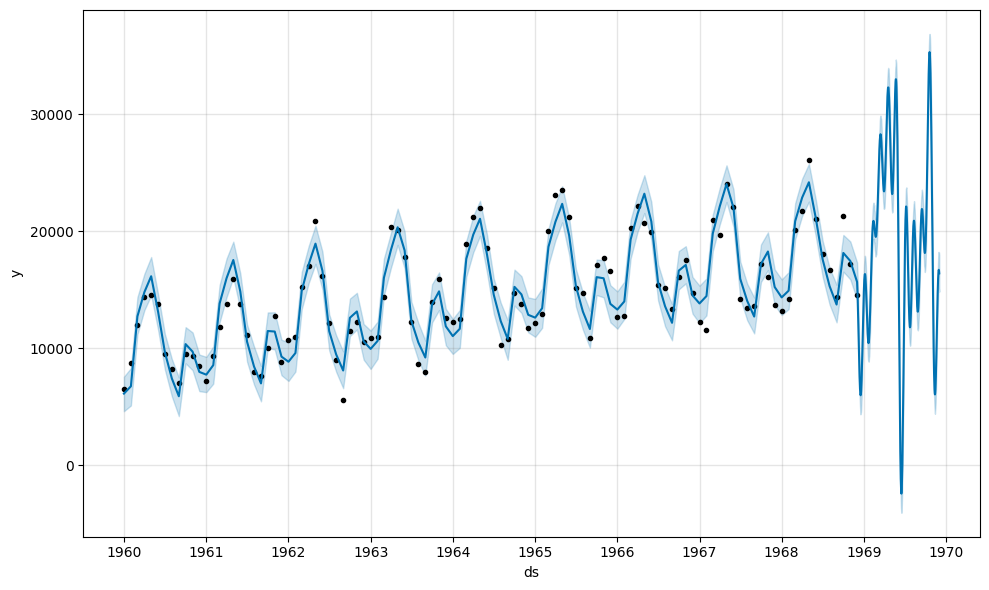

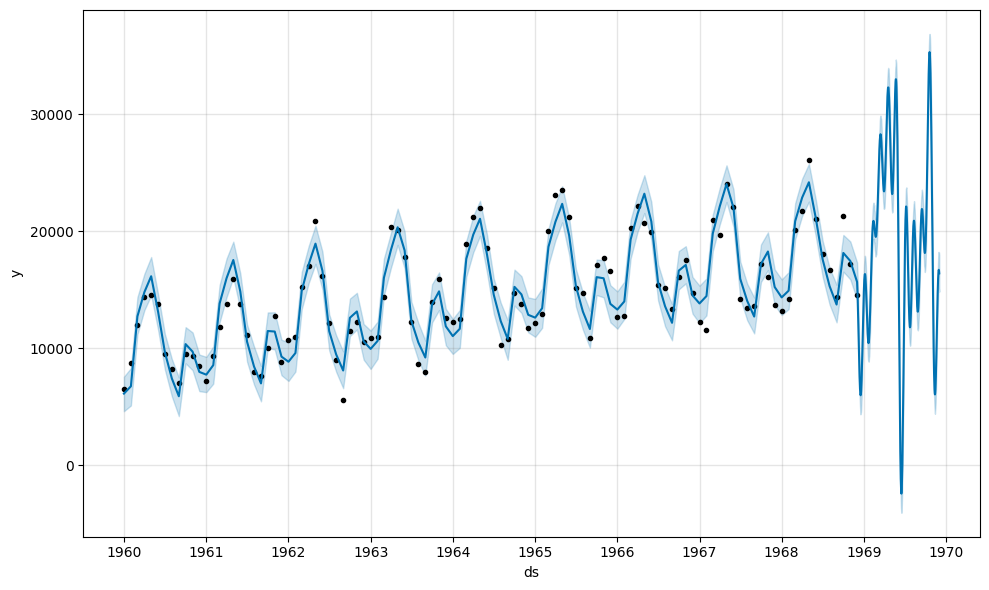

In [ ]:
### plot the predicted projection
model.plot(prediction)

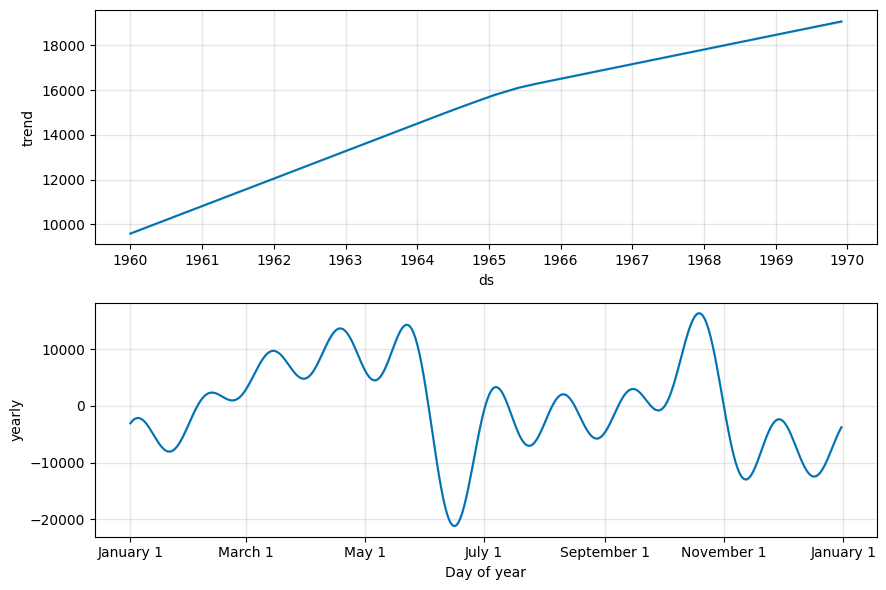

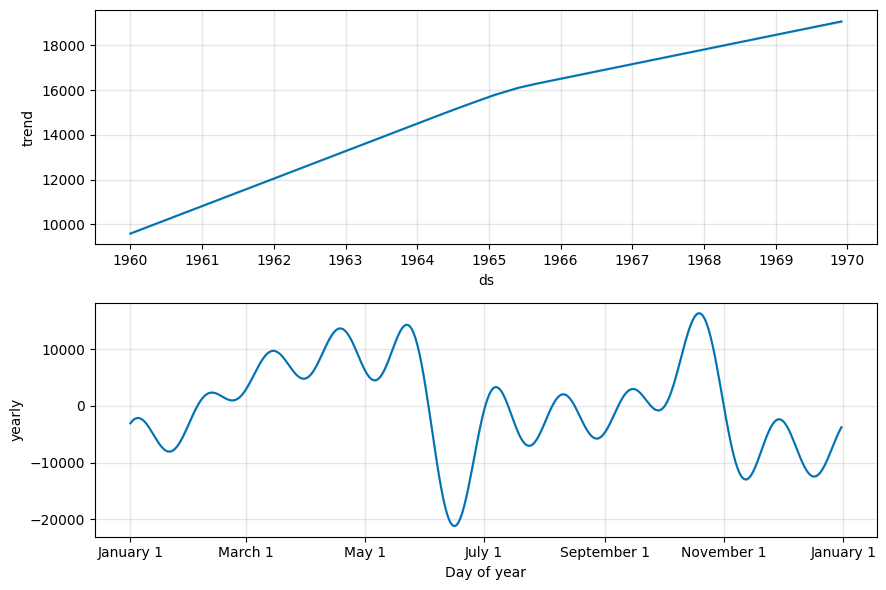

In [ ]:
#### Visualize Each Components[Trends,yearly]
model.plot_components(prediction)

In [ ]:
# Time Series Analysis

# 1960-1962
# Cross Validation
# 1960-61---Train dataset
# 1961-62--Test dataset
# 1962-63---Validation


In [ ]:
df.head()

,ds,y
0,1960-01-01,6550
1,1960-02-01,8728
2,1960-03-01,12026
3,1960-04-01,14395
4,1960-05-01,14587


In [ ]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='730 days', period='180 days', horizon = '365 days')
df_cv.head()

INFO:prophet:Making 13 forecasts with cutoffs between 1962-01-02 00:00:00 and 1967-12-02 00:00:00


  0%|          | 0/13 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 19.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq7qxcmpm/ccchupnk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq7qxcmpm/vhpj9l06.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67121', 'data', 'file=/tmp/tmpq7qxcmpm/ccchupnk.json', 'init=/tmp/tmpq7qxcmpm/vhpj9l06.json', 'output', 'file=/tmp/tmpq7qxcmpm/prophet_modelj1qxfj5i/prophet_model-20230701160735.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
16:07:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:07:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 23.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq7qxcmpm/574od0z6.json
DEBUG:cmdstanpy:input tempfi

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1962-02-01,11681.807786,11373.056977,12030.764168,10947,1962-01-02
1,1962-03-01,14642.239275,14280.607833,14996.940393,15200,1962-01-02
2,1962-04-01,16139.565853,15809.531248,16487.053124,17010,1962-01-02
3,1962-05-01,20238.581267,19876.077684,20614.948920,20900,1962-01-02
4,1962-06-01,16914.228087,16563.637625,17268.242614,16205,1962-01-02


In [ ]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,36 days,2.421494e+06,1556.114914,1378.673147,0.114238,0.108454,0.106949,0.333333
1,40 days,2.415352e+06,1554.140347,1365.646361,0.112929,0.108454,0.105612,0.333333
2,42 days,2.738554e+06,1654.857553,1442.170342,0.121945,0.108454,0.113119,0.333333
3,46 days,2.950161e+06,1717.603239,1519.865987,0.127710,0.114263,0.118047,0.266667
4,47 days,3.165788e+06,1779.266247,1614.503892,0.134171,0.125212,0.125038,0.200000


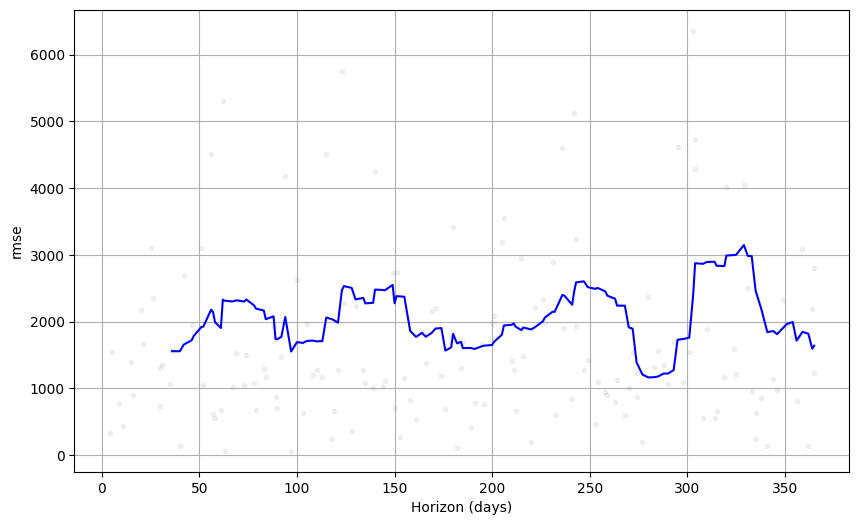

In [ ]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')

MAE: 1055.586


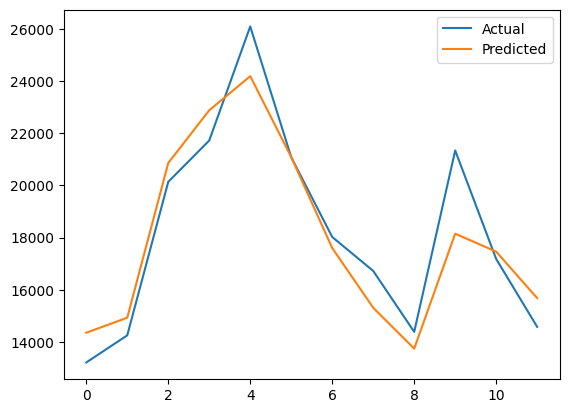

In [ ]:
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot

future = list()
for i in range(1, 13):
	date = '1968-%02d' % i
	future.append([date])
future = pd.DataFrame(future)
future.columns = ['ds']
future['ds'] = pd.to_datetime(future['ds'])
# use the model to make a forecast
forecast = model.predict(future)

y_true = df['y'][-12:].values
y_pred = forecast['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)
# plot expected vs actual
pyplot.plot(y_true, label='Actual')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
np.sqrt(mean_squared_error(y_true,y_pred))

1333.312853507238